<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Cuader_Des_Gra_Momen_Aula_B_48_github_27_OCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

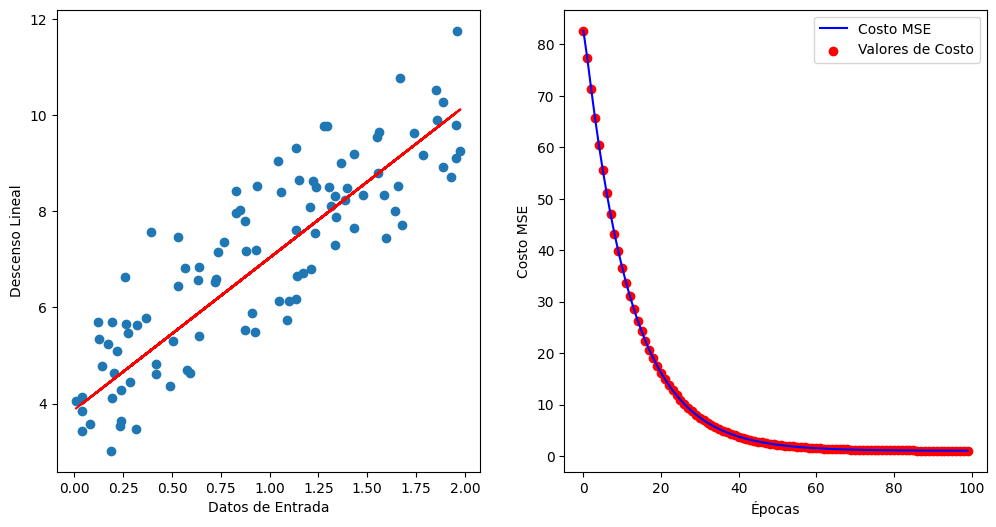

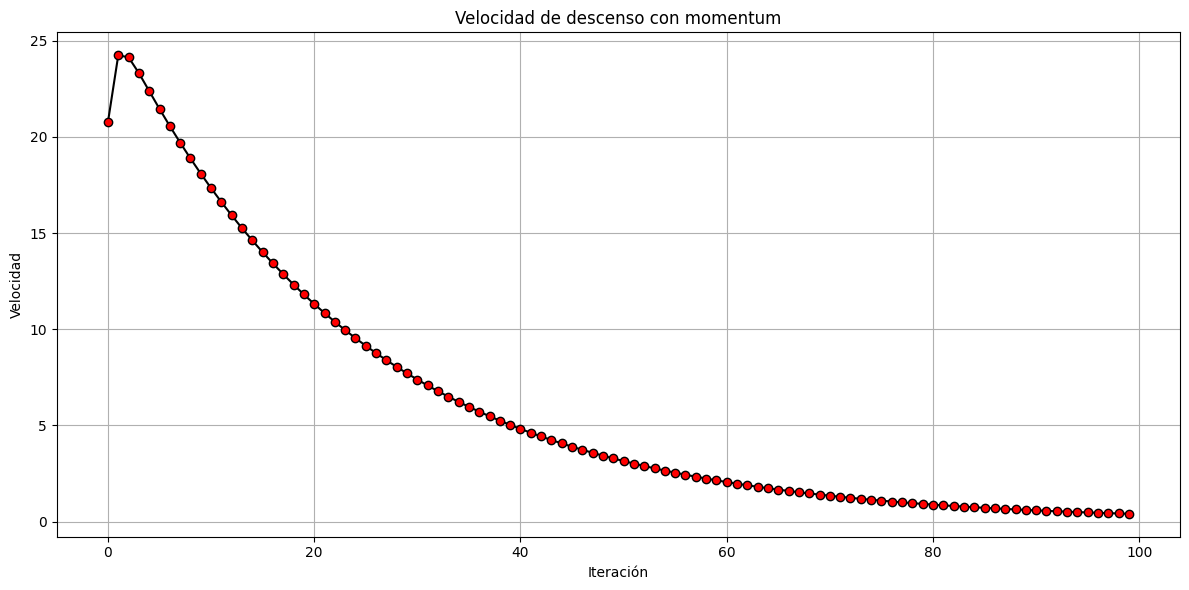

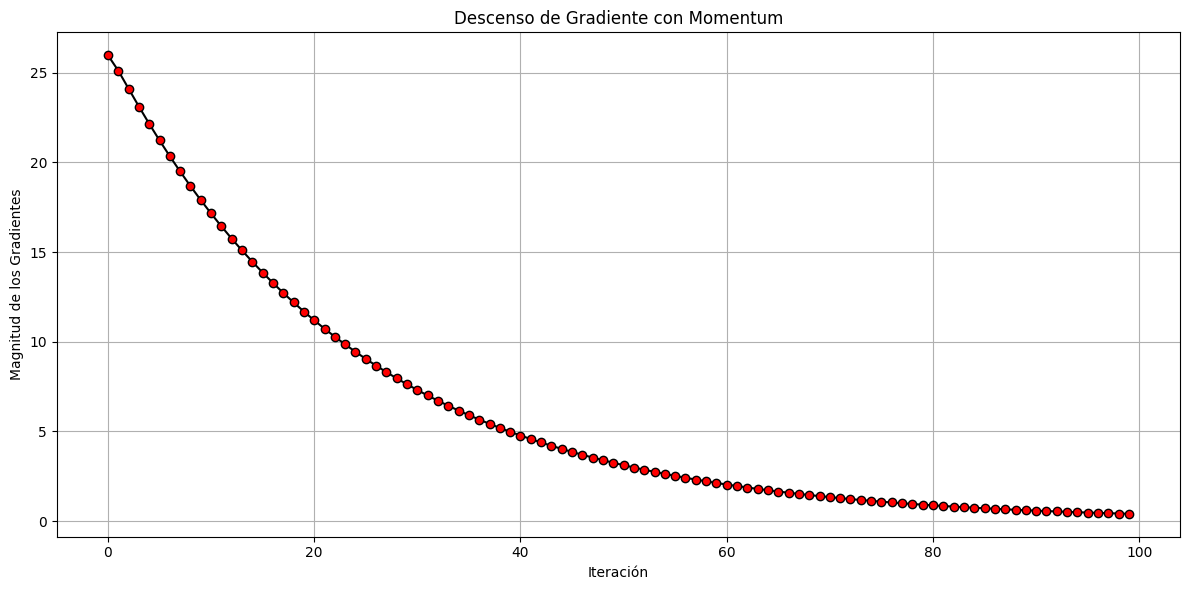

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Datos sintéticos
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Función de costo MSE
def mse_cost(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Descenso de gradiente con momentum
def gradient_descent_momentum(X, y, learning_rate, epochs, beta):
    m = len(y)
    theta = np.random.randn(2, 1)
    velocity = np.zeros_like(theta)
    cost_history = []
    valor_Velocidad = []
    gradientes=[]
    for epoch in range(epochs):
        y_pred = X.dot(theta)
        gradient = -(2/m) * X.T.dot(y - y_pred)
        velocity = beta * velocity + (1 - beta) * gradient
        theta -= learning_rate * velocity
        cost = mse_cost(y, y_pred)
        cost_history.append(cost)
        valor_Velocidad.append(np.linalg.norm(velocity))  # Calcula la norma de la velocidad en lugar del vector
        gradientes.append(gradient)
    return theta, cost_history, valor_Velocidad,gradientes

# Agregar una columna de unos a la matriz X para el término de sesgo
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Parámetros del descenso de gradiente
learning_rate = 0.01
epochs = 100
momentum_beta = 0.2

# Realizar el descenso de gradiente con momentum
theta_best, cost_history, valor_Velocidad,gradientes = gradient_descent_momentum(X_b, y, learning_rate, epochs, momentum_beta)

# Graficar el comportamiento del descenso lineal
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta_best), color='red')
plt.xlabel('Datos de Entrada')
plt.ylabel('Descenso Lineal')

# Graficar el descenso de gradiente de costos MSE
plt.subplot(122)
plt.plot(range(epochs), cost_history, color='blue', label='Costo MSE')
plt.scatter(range(epochs), cost_history, color='red', marker='o', label='Valores de Costo')
plt.xlabel('Épocas')
plt.ylabel('Costo MSE')
plt.legend()

# Graficar la velocidad de descenso con momentum
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), valor_Velocidad, color='black', marker='o', markerfacecolor='red', linestyle='-')
plt.xlabel('Iteración')
plt.ylabel('Velocidad')
plt.title('Velocidad de descenso con momentum')
plt.grid(True)

plt.tight_layout()
plt.show()

# Graficar gradientes en función de la iteración
plt.figure(figsize=(12, 6))
gradients = [np.linalg.norm(gradient) for gradient in gradientes]  # Calcula la magnitud de los gradientes
plt.plot(range(epochs), gradients, color='black', marker='o', markerfacecolor='red', linestyle='-')
plt.xlabel('Iteración')
plt.ylabel('Magnitud de los Gradientes')
plt.title('Descenso de Gradiente con Momentum')
plt.grid(True)
plt.tight_layout()
plt.show()

